Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **6. studenog 2022. u 23:59h**

------------------------------

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [ ]:
# Učitaj osnovne biblioteke...
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!= None: 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [ ]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [ ]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

[array([2.1]), array([-0.5, -0.1])]
Tocnost je: 1.0
[1 1 1 1 0 0 0]


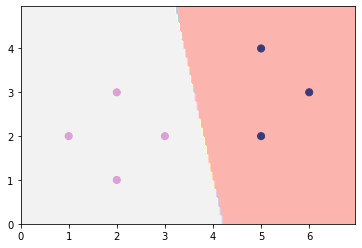

In [ ]:
reg_kval= RidgeClassifier(alpha=0)
reg_kval.fit(seven_X, seven_y)

def h(x):
  return reg_kval.predict(x)==1

w = []
w.append(reg_kval.intercept_)

for i in range(len(reg_kval.coef_)):
    w.append(reg_kval.coef_[i])

print(w)

print("Tocnost je: "+ str(accuracy_score(seven_y, reg_kval.predict(seven_X))))
print(reg_kval.predict(seven_X))
plot_2d_clf_problem(seven_X, seven_y, h)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

[1.5500000000000003, -0.25000000000000006, -0.05000000000000007]
[ 1.   0.9  1.2  0.7  0.2  0.1 -0.1]


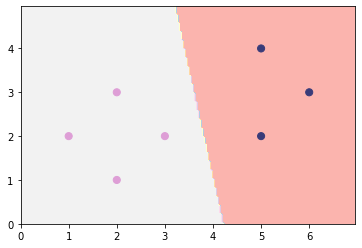

In [ ]:
reg= LinearRegression()
reg.fit(seven_X, seven_y)

h=lambda x : reg.predict(x) >= 0.5

w = []
w.append(reg.intercept_)

for i in range(len(reg.coef_)):
    w.append(reg.coef_[i])

print(w)
print(reg.predict(seven_X))
plot_2d_clf_problem(seven_X, seven_y, h)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

Bila bi 0.

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [ ]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

[array([0.84938704]), array([-0.4028021 ,  0.30823117])]
Tocnost je: 0.875
[1 1 1 1 0 1 0 0]


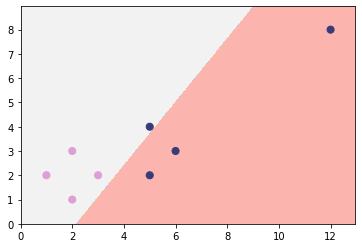

In [ ]:
reg_kval= RidgeClassifier(alpha=0)
reg_kval.fit(outlier_X, outlier_y)

def h(x):
  return reg_kval.predict(x)==1

w = []
w.append(reg_kval.intercept_)

for i in range(len(reg_kval.coef_)):
    w.append(reg_kval.coef_[i])

print(w)

print("Tocnost je: "+ str(accuracy_score(outlier_y, reg_kval.predict(outlier_X))))
print(reg_kval.predict(outlier_X))
plot_2d_clf_problem(outlier_X, outlier_y, h)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

podatak 12, 8 ga vuće u krivu stranu tj kaznjava dobro klasificiran primjer, a to je zbog pogreske kvadratnog gubitka

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [ ]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

[array([1.50505051]), array([-0.4040404 , -0.08080808])]
Tocnost je: 0.875
[1 1 1 1 0 0 0 1]


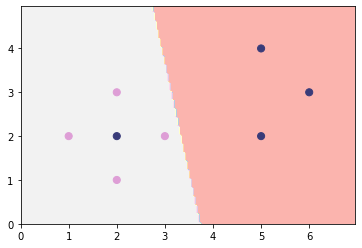

In [ ]:
reg_kval= RidgeClassifier(alpha=0)
reg_kval.fit(unsep_X, unsep_y)

def h(x):
  return reg_kval.predict(x)==1

w = []
w.append(reg_kval.intercept_)

for i in range(len(reg_kval.coef_)):
    w.append(reg_kval.coef_[i])

print(w)

print("Tocnost je: "+ str(accuracy_score(unsep_y, reg_kval.predict(unsep_X))))
print(reg_kval.predict(unsep_X))
plot_2d_clf_problem(unsep_X, unsep_y, h)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

Podatcima jer ocito je da je primjer [2,2], 0 krivo oznacen ili je samo anomalija.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

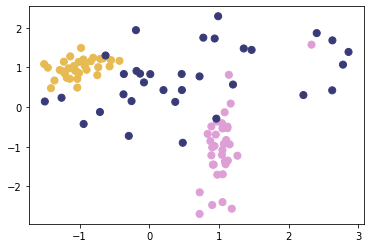

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_classes=3,  n_clusters_per_class=1)
plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

OVO je jednostavnija, ali nedaje točnu kvalifikaciju, postoji prostor neodređenosti.

Za OVR treba trenirati manje modela, ali postoji problem neuravnoteženosti, ako klasa nema puno i nije veliki problem složenosti OVO je bolji

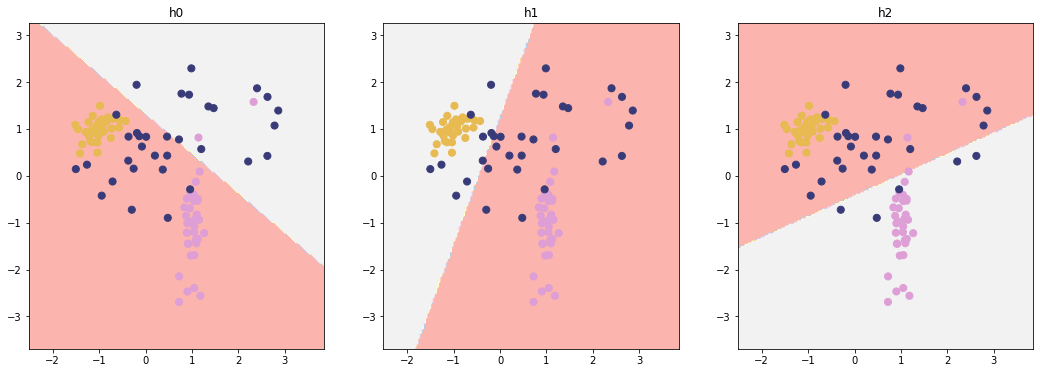

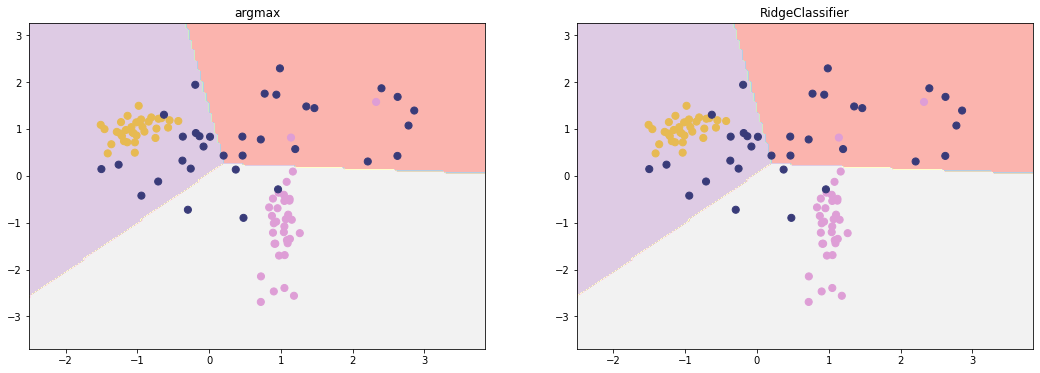

In [ ]:
from numpy.ma.core import argmax
from IPython.utils.process import arg_split
y0=[]
y1=[]
y2=[]

for i in y:
  if i==0:
    y0.append(1)
    y1.append(0)
    y2.append(0)

  elif i==1:
    y0.append(0)
    y1.append(1)
    y2.append(0)

  elif i==2:
    y0.append(0)
    y1.append(0)
    y2.append(1) 

reg0 = LinearRegression().fit(X, y0)
h0 = lambda x: reg0.predict(x) >= 0.5


reg1 = LinearRegression().fit(X, y1)
h1 = lambda x: reg1.predict(x) >= 0.5


reg2 = LinearRegression().fit(X, y2)
h2 = lambda x: reg2.predict(x) >= 0.5

plt.figure(figsize=(18 ,6))
plt.subplot(1, 3, 1)
plt.title("h0")
plot_2d_clf_problem(X, y, h0)
plt.subplot(1, 3, 2)
plt.title("h1")
plot_2d_clf_problem(X, y, h1)
plt.subplot(1, 3, 3)
plt.title("h2")
plot_2d_clf_problem(X, y, h2)

h_argmax=lambda x: np.argmax([reg0.predict(x.reshape(1, -1)), reg1.predict(x.reshape(1, -1)), reg2.predict(x.reshape(1, -1))])


reg_kval= RidgeClassifier(alpha=0)
reg_kval.fit(X, y)
h_reg_kval= lambda x: reg_kval.predict(x)


plt.figure(figsize=(18 ,6))
plt.subplot(1, 2, 1)
plt.title("argmax")
plot_2d_clf_problem(X, y, h_argmax)
plt.subplot(1, 2, 2)
plt.title("RidgeClassifier")
plot_2d_clf_problem(X, y, h_reg_kval)


### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

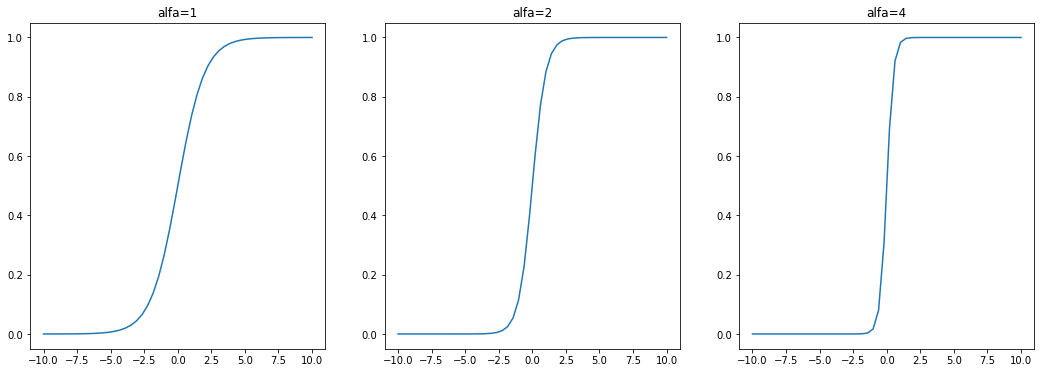

In [ ]:
def sigmoid_function(x, a=1):
    return 1.0/(1+np.exp(-a*x))


x=np.linspace(-10, 10)

plt.figure(figsize=(18 ,6))
plt.subplot(1, 3, 1)
plt.title("alfa=1")
plt.plot(x, sigmoid_function(x, a=1))

plt.subplot(1, 3, 2)
plt.title("alfa=2")
plt.plot(x, sigmoid_function(x, a=2))

plt.subplot(1, 3, 3)
plt.title("alfa=4")
plt.plot(x, sigmoid_function(x, a=4))

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

Vrijednost stavlja na intervala 0 do 1,izgledom slična funkciji praga, ali je moguće dobiti njenu derivaciju.

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

Što je alfa veči fo je veći nagib funkcije. I onda za veće težine vraća rezultate koji su bliži funkciji praga tj norma težina raste

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [ ]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures
import math

def lr_h(x, w):
    func = PolynomialFeatures(degree=1)
    fi=func.fit_transform(x.reshape(1,-1))
    return sigmoid_function(fi.dot(w))

def cross_entropy_error(X, y, w):
    e=0
    for i in range(len(X)):
      e=e+(-y[i]*math.log(lr_h(X[i], w))-(1-y[i])*math.log(1-lr_h(X[i], w)))

    return e/len(X)

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    w_tilda = np.zeros(shape(X)[1] + 1) # [w0, w1, w2]
    N = len(X)
    w_trace = [];
    
    err_poc=sys.maxsize * 2 + 1

    for iter in range(max_iter):
        delta_w0 = 0
        delta_w = np.zeros(shape(X)[1]);
        err=0
        for i in range(N):
            h = lr_h(X[i], w_tilda)
            delta_w0 =delta_w0- (h - y[i])*1 #jedan je dummy kao?
            delta_w =delta_w- (h - y[i])*X[i]
            err= err + (-y[i] * math.log(h) - (1 - y[i]) * math.log(1 - h))

        if abs(err_poc - err) < epsilon: 
            print("Zavrsenu u iteraciji "+ str(iter))
            break
        
        else: err_poc = err
            
        w_tilda[0] += eta*delta_w0

        w_tilda[1:] = w_tilda[1:] * (1-eta*alpha) + eta*delta_w

        w_trace.extend(w_tilda)
        
    if trace:
        return w_tilda, w_trace
        
    else: return w_tilda
    


### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [ ]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

In [ ]:
w = lr_train(seven_X, seven_y, max_iter=2000, epsilon=0.0001)

E(w|D) = 0.07751718252492557


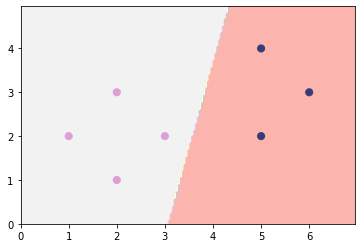

In [ ]:
from sklearn.metrics import log_loss
print("E(w|D) = "+ str(cross_entropy_error(seven_X, seven_y, w)))

h= lambda x: lr_h(x, w) > 0.5

plot_2d_clf_problem(seven_X, seven_y, h)

**Q:** Koji kriterij zaustavljanja je aktiviran?

Broj iteracija 

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?
Zato je cee kaznjabva i tocno kvalificirane primjere na način ta gleda sigurnost kvalifikacije tj ako ej primjer bliže pravcu njega kazni više nego onaj koji je udaljeniji od pravca.


**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

Dodavanjem još primjera, o njihovom položaju

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

Trebao bih računati pogrešku za svaki primjer i onda ažurirati težine, takože stohastički algorita sadrđi nasumično permutiranje težina i ne koristimo linijsko pretraživanje.

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [ ]:
from sklearn.metrics import zero_one_loss

Zavrsenu u iteraciji 1544
Zavrsenu u iteraciji 1128


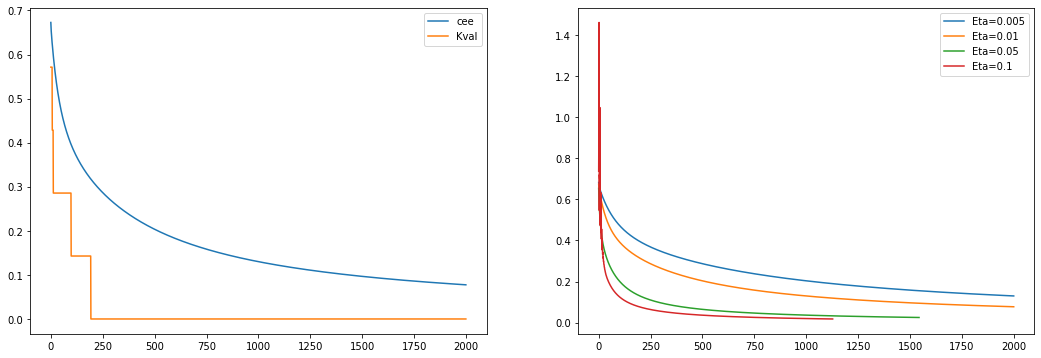

In [ ]:
[w, w_trace] = lr_train(seven_X, seven_y, trace=True)
w_trace_fixed=[]

for i in range(0,len(w_trace), 3):
    pom=[]
    for j in [0,1,2]:
      pom.append(w_trace[i+j])

    w_trace_fixed.append(pom)  

fi = PolynomialFeatures(1).fit_transform(seven_X)
h = lambda x: x >= 0.5

err_cee=[]
err_kval=[]

for i in range(len(w_trace_fixed)):
    err_cee.append(cross_entropy_error(seven_X, seven_y, w_trace_fixed[i]))
    err_kval.append(zero_one_loss(seven_y, h(sigmoid_function(fi.dot(w_trace_fixed[i])))))


err_eta=[]

for eta in [0.005, 0.01, 0.05, 0.1]:
    err = []
    [w_eta, w_trace_eta] = lr_train(seven_X, seven_y, eta=eta, trace=True)
    w_trace_fixed_eta=[]

    for i in range(0,len(w_trace_eta), 3):
      pom=[]
      for j in [0,1,2]:
        pom.append(w_trace_eta[i+j])

      w_trace_fixed_eta.append(pom)  

    for i in range(len(w_trace_fixed_eta)):
        err.append(cross_entropy_error(seven_X, seven_y, w_trace_fixed_eta[i]))
    
    err_eta.append(err)

plt.figure(figsize=(18 ,6))
plt.subplot(1,2,1)
plt.plot(err_cee)
plt.plot(err_kval) 
plt.legend(["cee", "Kval"]);

plt.subplot(1,2,2)

eta=[0.005, 0.01, 0.05, 0.1]
for i in range(4):
    plt.plot(err_eta[i], label = "Eta=" + str(eta[i]))
plt.legend()
plt.show()



**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?
Cee je veća je rnikad neće doći u nulu samo teži nuli, a gubitak 0-1 je 0 kad točno kvalificira, to nije tako tza primjere gdje je nemoguće klasificirati sve ispravno, poput onog unsep skupa.

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto? 

Od ponuđenih 0.1 jer s njom se pogreška najbrže dođe ispod kritičene razine s kojom smo zadovoljni.

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

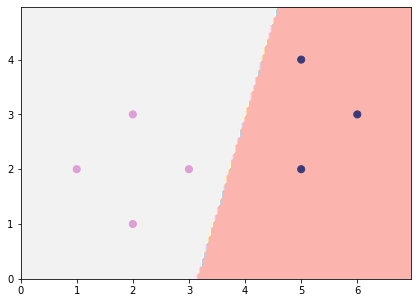

In [ ]:
from sklearn.linear_model import LogisticRegression

#C je kao inverz alfe al ne moze bit 0 pa broj blizu 0, ako je manje 0 prije jedan slika nije ko gore
log_reg = LogisticRegression(max_iter=2000, tol=0.0001, C=0.000001**-1)
log_reg.fit(seven_X,seven_y)
h = lambda x : log_reg.predict(x)

plt.figure(figsize=(7, 5))
plot_2d_clf_problem(seven_X,seven_y, h)

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

In [ ]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

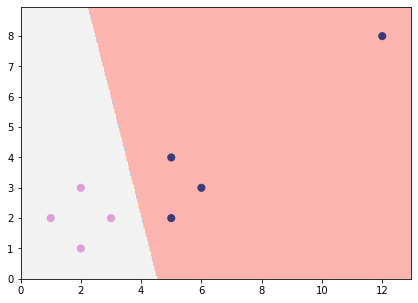

In [ ]:
log_reg = LogisticRegression(max_iter=2000, tol=0.0001)
log_reg.fit(outlier_X,outlier_y)
h = lambda x : log_reg.predict(x)

plt.figure(figsize=(7, 5))
plot_2d_clf_problem(outlier_X,outlier_y, h)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

Drugačija je funkcija gubitka, koristi logistički gubitak umjesto kvadratnog

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

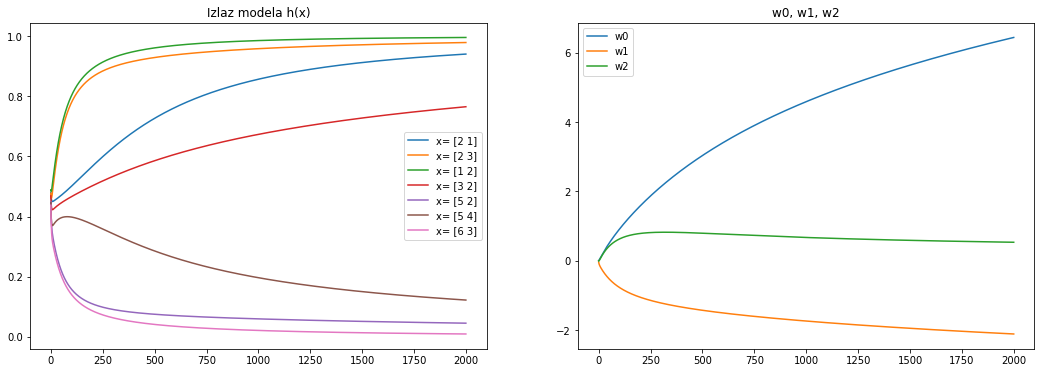

In [ ]:
[w, w_trace] = lr_train(seven_X, seven_y, trace = True)

w0 = []; w1= []; w2= [];   

w_trace_fixed=[]
for i in range(0,len(w_trace), 3):
    pom=[]
    for j in [0,1,2]:
      pom.append(w_trace[i+j])

    w_trace_fixed.append(pom) 

for w in w_trace_fixed:
  w0.append(w[0])
  w1.append(w[1])
  w2.append(w[2])

h = []

for i in range(0, len(seven_X)):
    h_i = []

    for j in range(len(w_trace_fixed)):
        h_i.append(lr_h(seven_X[i], w_trace_fixed[j]))
        
    h.append(h_i)

plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
for i in range(0, len(h)):
    plt.plot(h[i], label = "x= "+ str(seven_X[i]))

plt.title("Izlaz modela h(x)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(w0)
plt.plot(w1)
plt.plot(w2)
plt.legend(["w0", "w1", "w2"]);
plt.title("w0, w1, w2");

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [ ]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Zavrsenu u iteraciji 1315


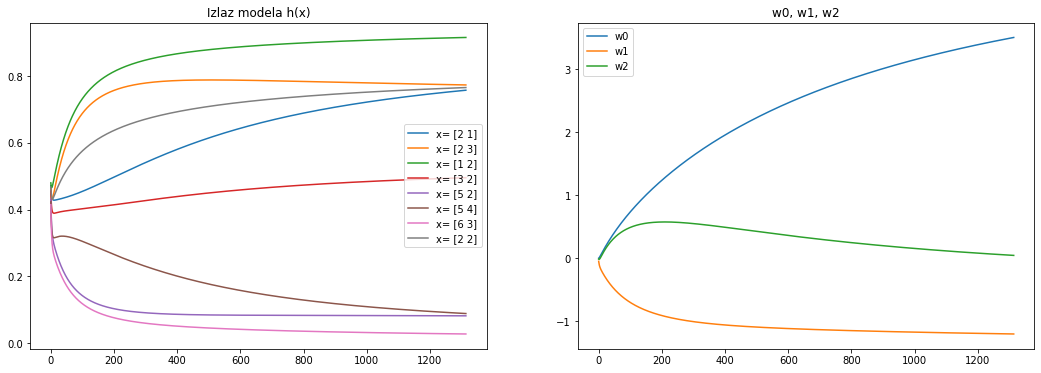

In [ ]:
[w, w_trace] = lr_train(unsep_X, unsep_y, trace = True)

w0 = []; w1= []; w2= [];   

w_trace_fixed=[]
for i in range(0,len(w_trace), 3):
    pom=[]
    for j in [0,1,2]:
      pom.append(w_trace[i+j])

    w_trace_fixed.append(pom) 

for w in w_trace_fixed:
  w0.append(w[0])
  w1.append(w[1])
  w2.append(w[2])

h = []

for i in range(0, len(unsep_X)):
    h_i = []

    for j in range(len(w_trace_fixed)):
        h_i.append(lr_h(unsep_X[i], w_trace_fixed[j]))
        
    h.append(h_i)

plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
for i in range(0, len(h)):
    plt.plot(h[i], label = "x= "+ str(unsep_X[i]))

plt.title("Izlaz modela h(x)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(w0)
plt.plot(w1)
plt.plot(w2)
plt.legend(["w0", "w1", "w2"]);
plt.title("w0, w1, w2");

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [ ]:
from numpy.linalg import norm

Zavrsenu u iteraciji 772
Zavrsenu u iteraciji 230


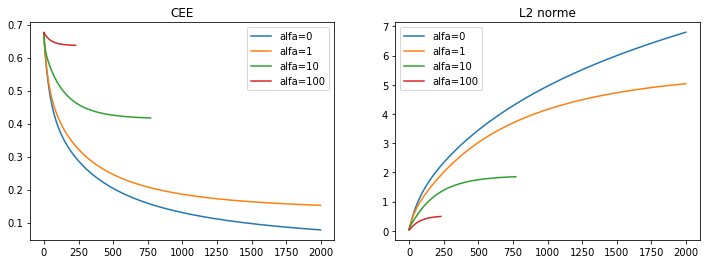

In [ ]:
alpha = [0, 1, 10, 100]

err = []
norm= [];

for a in alpha:
    [w, w_trace] = lr_train(seven_X, seven_y, alpha = a, trace = True)
    err_cee = []
    L2_norm = []
    
    w_trace_fixed=[]
    for i in range(0,len(w_trace), 3):
      pom=[]
      for j in [0,1,2]:
        pom.append(w_trace[i+j])

      w_trace_fixed.append(pom)

    for i in range(len(w_trace_fixed)):
        err_cee.append(cross_entropy_error(seven_X, seven_y, w_trace_fixed[i]))
        L2_norm.append(linalg.norm(w_trace_fixed[i]))
    
    err.append(err_cee)
    norm.append(L2_norm)
    
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
for i in range(len(err)):
    plt.plot(err[i], label = "alfa=" + str(alpha[i]))
    
plt.title('CEE')
plt.legend()

plt.subplot(1,2,2)
for i in range(len(norm)):
    plt.plot(norm[i], label = "alfa=" + str(alpha[i]))
    
plt.title('L2 norme')
plt.legend(loc = 'best')

**Q:** Jesu li izgledi krivulja očekivani i zašto?
Bez regularizacije cee je jako mali ali to možda znaći da je model prenaučen, ali prevelike alfa isto nisu dobre jer func prerano završi tj daođe ispod granice al se to ne vidi u cee.

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?
Vjerojatno alfa 1 zbog gore navedenih razloga.

S velikim alfa noram je manja sto je posljedica sigmoidne funkcije

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

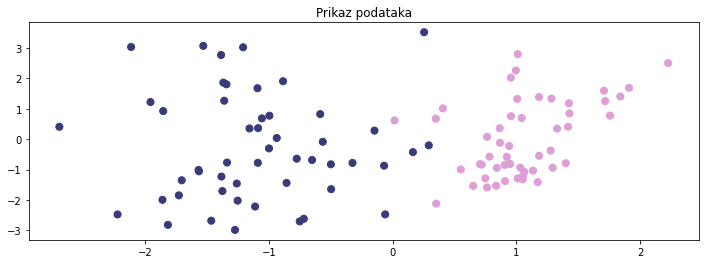

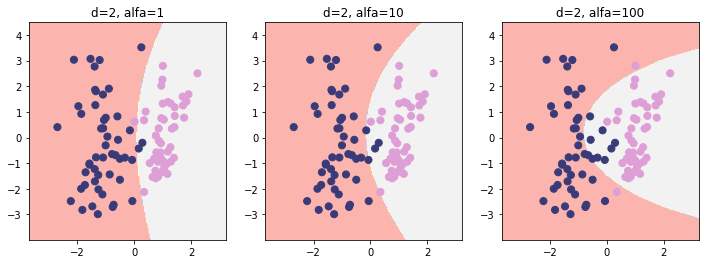

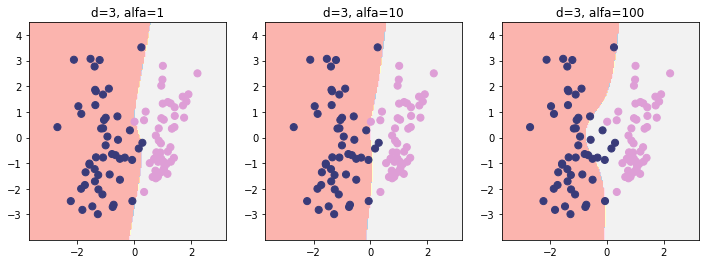

In [ ]:
from sklearn.datasets import make_classification

[X, y] = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)
plt.figure(figsize=(12, 4))
plt.title("Prikaz podataka")
plot_2d_clf_problem(X, y)



for d in [2, 3]:
  plt.figure(figsize=(12 ,4))
  i=1
  for alfa in [1, 10, 100]:
    func=PolynomialFeatures(degree=d)
    fi=func.fit_transform(X)
    
    log_reg=LogisticRegression(C=alfa**-1)
    log_reg.fit(fi, y)

    h=lambda x : log_reg.predict(func.transform(x))
    
    plt.subplot(1,3,i)
    plt.title("d="+str(d)+", alfa="+str(alfa))
    plot_2d_clf_problem(X, y, h)
    i=i+1


**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?
d=3 jer sa d=2 ostavlja izgled da postoji prostor koji bi mogao biti krivo kvalificiran. Je jer i za veće alfa d=3 pokazuje bolje rezultate pa je ta kombinacija idealna.